In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import multivariate_normal
import seaborn as sns
import pandas as pd
from datetime import timedelta

## Часть I: О теореме Байеса

### 1.
Произошло убийство. На месте убийства найдена кровь, которая явно (будем считать, что с вероятностью 1) принадлежит настоящему убийце. Кровь принадлежит редкой группе, которая присутствует всего лишь у 1% населения. И так получилось, что у подсудимого как раз эта редкая группа крови!

Первым выходит прокурор и говорит: “Шанс, что у подсудимого была бы именно такая группа крови, если бы он был невиновен -- всего 1%; значит, с вероятностью 99% он виновен, предлагаю осудить”. В чём не прав прокурор? Укажите, какие вероятности он оценил, а какие должен был оценить.


#### Ответ:
* А - редкая группа крови у подсудимого
* B - подсудимый виновен

Прокурор оценил $P(A | \overline B)$, а должен был $P(B | A) = \frac{P(B)P(A | B)}{P(A)}$

Он заявил, что $P(A | \overline B)=0.01$ - у подсудимого именно такая группа крови, если он невиновен 

а значит $P(\overline A | \overline B)=0.99$ - предлагаю осудить

поближе рассмотрим $P(B | A)$:

заметим, что $P(A | B)=1$

$$P(B | A) = \frac{P(B)P(A | B)}{P(B)P(A | B) + P(A | \overline B)P(\overline B)} = \frac{P(B)}{P(B) + 0.01(1 - P(B))}$$

где P(B) - арприорная вероятность того, что подозреваемый убийца 

Попробуем повизуализировать постериорную вероятность при некоторых значениях априорной

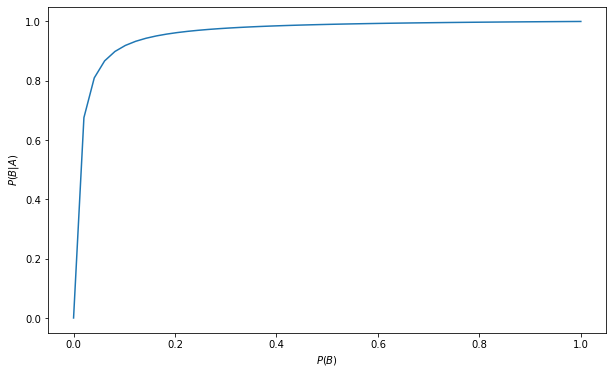

In [2]:
def get_posterior(p_b):
    return p_b / ( 0.99 * p_b + .01)

p_b = np.linspace(0, 1, 50)
plt.figure(figsize=(10, 6))
plt.plot(p_b, get_posterior(p_b))
plt.xlabel('$P(B)$')
plt.ylabel('$P(B|A)$')
plt.show()

In [3]:
print(f"к слову при P(B)=0.5, P(B|A)={get_posterior(.5):.3}")

к слову при P(B)=0.5, P(B|A)=0.99


## 2.
Затем выходит адвокат, объясняет ошибки прокурора и берёт слово сам: “В городе живёт миллион человек. Это значит, что примерно у 10000 из них такая группа крови. Значит, всё, что говорит нам эта кровь -- это то, что подсудимый совершил убийство с вероятностью 0.01%. Получается, что это свидетельство не просто не является строгим доказательством, а и вовсе даёт нам ничтожно малую вероятность того, что мой подзащитный виновен, так что предлагаю исключить его из материалов дела”. В чём не прав адвокат? Какие вероятности он оценил, а какие должен был оценить?


#### Ответ:

In [4]:
get_posterior(.01)

0.5025125628140703

Он указал априорную вероятность, но даже при такой крохотной вероятности условие делает априорную достаточно большой

Похоже, что юрист и сам не разбирается или же очень хорошо делает свою работу

### 3.
Вернёмся к тесту на страшную болезнь из первой лекции. Напомню, что по предположениям задачи болеет 1% населения, а тест имеет вероятность ошибки 5% в обе стороны. Мы видели, что в результате человек с положительным тестом имеет апостериорную вероятность оказаться больным всего лишь около 16%.

Врачи решили, что терпеть это никак нельзя; они готовы провести срочное исследование и улучшить качество теста. Но сил и денег хватит только для того, чтобы сократить один тип ошибок, т.е. уменьшить или только число false positives (когда тест выдаёт положительный результат у здорового человека), или только число false negatives (когда тест выдаёт отрицательный результат у больного).

Помогите медикам: постройте зависимости апостериорной вероятности болезни после положительного и отрицательного теста от обоих видов ошибок (например, в виде графиков), сделайте выводы и дайте рекомендации врачам -- на чём лучше сосредоточиться?


#### Ответ:

* A - положительный тест
* B - болен

* $P(A | \overline B) - fp$
* $P(\overline A | B) - fn$

* $P(\overline A | \overline B) = 1 - P(A | \overline B)$
* $P( A |  B) = 1 - P(\overline A | B)$

$$P(B | A) = \frac{P(B)P(A|B)}{P(A)}=\frac{0.01(1-fn)}{0.01(1-fn)+0.99fp}$$

$$P(B | \overline A)=\frac{P(B)(\overline A | B)}{P(\overline A)}=\frac{0.01fn}{0.01fn+0.99(1-fp)}$$

In [5]:
def get_posterior_proba(fp, fn, positive_test):
    if positive_test:
        return 0.01 * (1 - fn) / (0.01 * (1 - fn) + 0.99 * fp) # P(B|A)
    else:
        return 0.01 * fn / (0.01 * fn + 0.99 * (1 - fp)) # P(B|-A)   

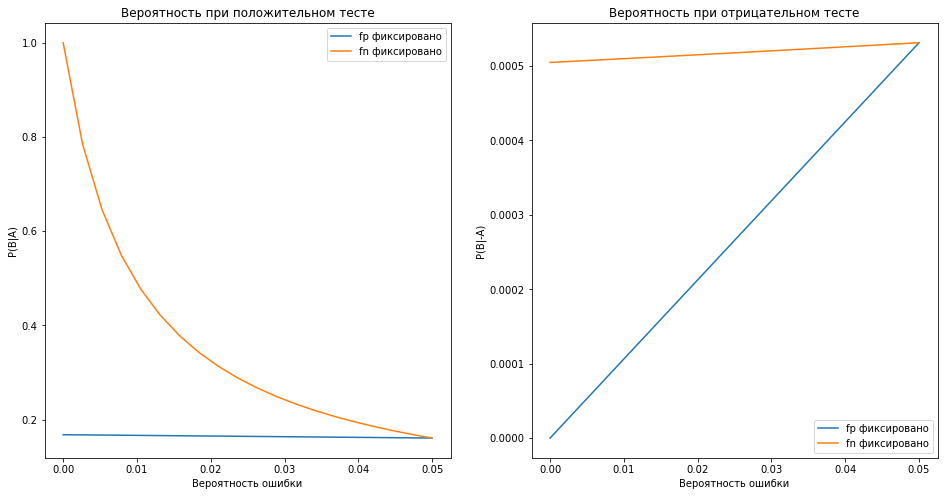

In [6]:
errors = np.linspace(0, 0.05, 20)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

proba = get_posterior_proba(0.05, errors, True)
ax1.plot(errors, proba, label="fp фиксировано")
proba = get_posterior_proba(errors, 0.05, True)
ax1.plot(errors, proba, label="fn фиксировано")
ax1.set_xlabel("Вероятность ошибки")
ax1.set_ylabel("P(B|A)")
ax1.set_title("Вероятность при положительном тесте")
ax1.legend()

proba = get_posterior_proba(0.05, errors, False)
ax2.plot(errors, proba, label="fp фиксировано")
proba = get_posterior_proba(errors, 0.05, False)
ax2.plot(errors, proba, label="fn фиксировано")
ax2.set_title("Вероятность при отрицательном тесте")
ax2.set_xlabel("Вероятность ошибки")
ax2.set_ylabel("P(B|-A)")
ax2.legend()

plt.show()

Если смотреть на график как бы слева направо, то $P(B|A)$ должна расти, а $P(B|\overline A)$ должна падать

А как мы можем наблюдать из графика при снижении fp точность растет экспоненциально, т.е. гораздо быстрее при fn, тогда я бы посоветовал врачам сконцентривать внимание именно на этом, к тому же, уменьшая fp, мы уменьшаем ложные срабатывания и нагрузку на врачей 

## Часть II: О линейной регрессии

### 1.
Скачайте данные в формате csv, выберите из таблицы данные по России, начиная с 3 марта 2020 г. (в этот момент впервые стало больше 2 заболевших). В качестве целевой переменной возьмём число случаев заболевания (столбцы total_cases и new_cases); для упрощения обработки можно заменить в столбце new_cases все нули на единицы. Для единообразия давайте зафиксируем тренировочный набор в виде первых 50 отсчётов (дней), начиная с 3 марта; остальные данные можно использовать в качестве тестового набора (и он даже будет увеличиваться по мере выполнения задания). Иначе говоря, мы будем “играть” за российские власти, которые пытаются понять, что делать, глядя на данные об эпидемии в мае 2020 года.


In [54]:
data = pd.read_csv("owid-covid-data.csv")

In [55]:
df = data[data['location'] == 'Russia'].copy()

In [56]:
df.date = pd.to_datetime(df.date)

In [57]:
df = df[(df.date >= pd.to_datetime('2020-03-03')) & (df.date <= pd.to_datetime('2020-03-03') + timedelta(70))]
df = df[['date', 'total_cases', 'new_cases']]

In [58]:
df.new_cases[df.new_cases == 0] = 1

In [59]:
df.head()

,date,total_cases,new_cases
52760,2020-03-03,3.0,1.0
52761,2020-03-04,3.0,1.0
52762,2020-03-05,4.0,1.0
52763,2020-03-06,13.0,9.0
52764,2020-03-07,13.0,1.0


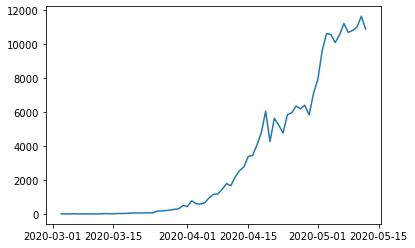

In [60]:
plt.plot(df.date, df.new_cases)

### 2.
Постройте графики целевых переменных. Вы увидите, что число заболевших растёт очень быстро, на первый взгляд экспоненциально. Для первого подхода к снаряду давайте это и используем.

#### a. 
Используя линейную регрессию, обучите модель с экспоненциальным ростом числа заболевших: y ~ *exp(линейная функция от x)*, где x — номер текущего дня.

In [61]:
df.head()

,date,total_cases,new_cases
52760,2020-03-03,3.0,1.0
52761,2020-03-04,3.0,1.0
52762,2020-03-05,4.0,1.0
52763,2020-03-06,13.0,9.0
52764,2020-03-07,13.0,1.0


In [62]:
X = np.arange(df.shape[0])
y_total = df.total_cases
y_new = df.new_cases

In [64]:
days = 50
X_train = X[:days]
y_train_total = y_total[:days]
y_train_new = y_new[:days]
X_test = X[days:]
y_test_total = y_total[days:]
y_test_new = y_new[days:]

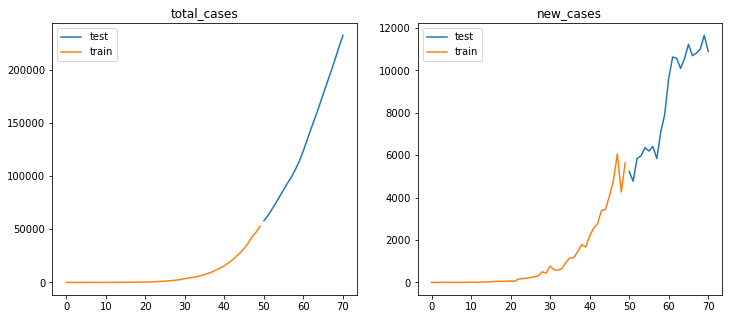

In [65]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.plot(X_test, y_test_total, label='test')
ax1.plot(X_train, y_train_total, label='train')
ax1.set_title('total_cases')
ax1.legend()

ax2.plot(X_test, y_test_new, label='test')
ax2.plot(X_train, y_train_new, label='train')
ax2.set_title('new_cases')
ax2.legend()
plt.show()

In [66]:
y_train_total_ln = np.log(y_train_total)
y_test_total_ln = np.log(y_test_total)

In [67]:
def add_ones(matr):
    return np.stack([np.ones(matr.shape[0]), matr], axis=-1)

In [68]:
X = add_ones(X)
X_train = add_ones(X_train)
X_test = add_ones(X_test)

In [69]:
alphas = np.arange(500, 10001, 500)

In [70]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

best_alpha = 1
best_train = 1e18
for alpha in alphas:
    model = Ridge(alpha=alpha, fit_intercept=False)
    model.fit(X_train, y_train_total_ln)
    train_error = np.sqrt(mean_squared_error(y_train_total, np.exp(model.predict(X_train))))
    test_error = np.sqrt(mean_squared_error(y_test_total, np.exp(model.predict(X_test))))
    print(f'alpha = {alpha}, train_error={train_error}, test_error={test_error}')
    
    if best_train > train_error:
        best_train = train_error
        best_alpha = alpha

alpha = 500, train_error=32186.99943952946, test_error=13318094.697362488
alpha = 1000, train_error=26372.727182352144, test_error=11076909.849090451
alpha = 1500, train_error=21195.546154736632, test_error=9107546.795133244
alpha = 2000, train_error=16763.86011740553, test_error=7490120.964148833
alpha = 2500, train_error=13010.812246644293, test_error=6174976.763524618
alpha = 3000, train_error=9869.670981451063, test_error=5106091.914749594
alpha = 3500, train_error=7308.156644907556, test_error=4235365.171800395
alpha = 4000, train_error=5360.202573129361, test_error=3523744.156490329
alpha = 4500, train_error=4162.4712441030815, test_error=2940039.856273485
alpha = 5000, train_error=3862.107923094946, test_error=2459456.6756252083
alpha = 5500, train_error=4299.386016358962, test_error=2062283.0305006378
alpha = 6000, train_error=5090.265905921339, test_error=1732819.270905066
alpha = 6500, train_error=5975.55943567696, test_error=1458526.074737792
alpha = 7000, train_error=6843.8

In [71]:
best_alpha

5000

In [72]:
model = Ridge(alpha=best_alpha, fit_intercept=False)
model.fit(X_train, y_train_total_ln)

Ridge(alpha=5000, fit_intercept=False)

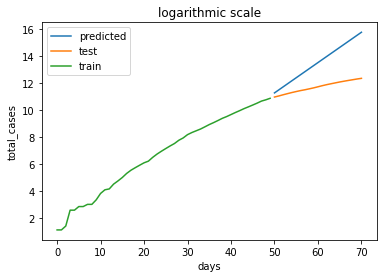

In [74]:
plt.plot(X_test[:, 1], model.predict(X_test), label='predicted')
plt.plot(X_test[:, 1], y_test_total_ln, label='test')
plt.plot(X_train[:, 1], np.log(y_train_total), label='train')
plt.xlabel('days')
plt.ylabel('total_cases')
plt.legend()
plt.title('logarithmic scale')
plt.show()

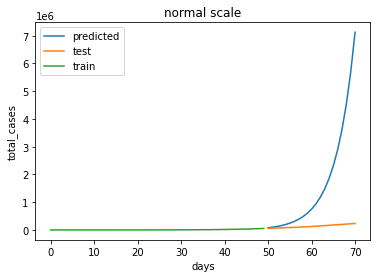

In [75]:
plt.plot(X_test[:, 1], np.exp(model.predict(X_test)), label='predicted')
plt.plot(X_test[:, 1], y_test_total, label='test')
plt.plot(X_train[:, 1], y_train_total, label='train')
plt.xlabel('days')
plt.ylabel('total_cases')
plt.legend()
plt.title('normal scale')
plt.show()

#### b.
Найдите апостериорное распределение параметров этой модели для достаточно широкого априорного распределения. Требующееся для этого значение дисперсии шума в данных оцените, исходя из вашей же максимальной апостериорной модели (это фактически первый шаг эмпирического Байеса).

In [76]:
noise = np.std(np.array(y_train_total_ln) - model.predict(X_train))
noise

0.5227328176468423

In [77]:
s = noise ** 2 / best_alpha # best_alpha = 4500
s

5.4649919729001385e-05

In [78]:
def bayesian_update(mu, sigma, x, y, sigma_noise):
    sigma_n = np.linalg.inv(np.linalg.inv(sigma) + (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x), x))
    mu_n = np.matmul(sigma_n, np.matmul(np.linalg.inv(sigma), np.transpose(mu)) + (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x), np.array(y)))
    return mu_n, sigma_n


def get_mu_sigma(X_train, y_train, s, noise):
    mu_0 = np.zeros(X_train.shape[1])
    sigma_0 = s * np.eye(X_train.shape[1])
    mu_n, sigma_n = bayesian_update(mu_0, sigma_0, X_train, y_train, noise)
    return mu_n, sigma_n

In [79]:
mu, sigma = get_mu_sigma(X_train, np.log(y_train_total), s, noise)
print('mu =', mu)
print('sigma =', sigma)

mu = [0.01148612 0.22525575]
sigma = [[ 5.44651220e-05 -1.46878975e-06]
 [-1.46878975e-06  6.05501081e-06]]


#### c.
Посэмплируйте много разных экспонент, постройте графики. Сколько, исходя из этих сэмплов, предсказывается случаев коронавируса в России к 1 мая 2020 года? к 1 июня? к 1 сентября? Постройте предсказательные распределения (можно эмпирически, исходя из данных сэмплирования).

In [80]:
def sample_lines(mu, sigma, n):
    ws = np.random.multivariate_normal(mu, sigma, n)
    
    for w in ws:
        plt.plot(X[:, 1], np.exp(X.dot(w)), 'k-', lw=.05)
    plt.plot(X_test[:, 1], np.exp(model.predict(X_test)), lw=2, label='predicted')
    plt.plot(X[:, 1], y_total, label='train + test', lw=2)
    plt.xlabel('days')
    plt.ylabel('total_cases')
    plt.legend()

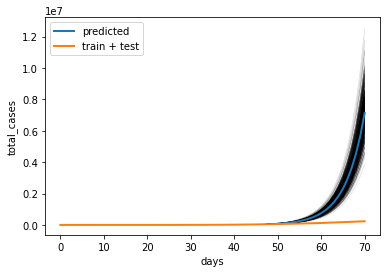

In [81]:
sample_lines(mu, sigma, 1000)

In [82]:
def get_preds(mu, sigma, date, n):
    days = (pd.to_datetime(date) - pd.to_datetime("2020-03-03")).days + 1
    ns = np.random.multivariate_normal(mu, sigma, n)
    preds = np.exp(ns[:, 1] + ns[:, 1] * days)
    sns.distplot(preds, bins=50)
    print(f"total on {date} is {preds.mean()}")

total on 2020-05-01 is 939632.3306441815


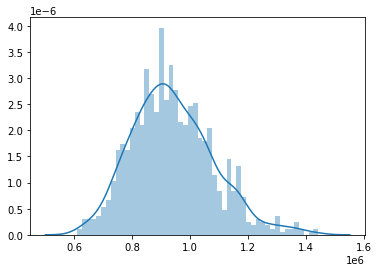

In [83]:
get_preds(mu, sigma, "2020-05-01", 1000)

### 3.
Предсказания экспоненциальной модели наверняка получились грустными. Но это, конечно, чересчур пессимистично — экспоненциальный рост в природе никак не может продолжаться вечно. Кривая общего числа заболевших во время эпидемии в реальности имеет сигмоидальный вид: после начальной фазы экспоненциального роста неизбежно происходит насыщение. В качестве конкретной формы такой сигмоиды давайте возьмём форму функции распределения для гауссиана:

$$\Phi(x)=\frac{1}{\sqrt{2 \pi}} \int_{-\infty}^{x}e^{\frac{-t^2}{2}}dt$$

Естественно, в нашем случае сигмоида стремится не к единице, т.е. константа перед интегралом может быть произвольной (и её можно внести в экспоненту), а в экспоненте под интегралом может быть произвольная квадратичная функция от t.

#### a.
Предложите способ обучать параметры такой сигмоидальной функции при помощи линейной регрессии.

In [84]:
def make_polinom(X):
    return np.stack([np.ones(X.shape[0]), X[:, 1], X[:, 1] **2], axis=-1)

In [85]:
X = make_polinom(X)
X_train = make_polinom(X_train)
X_test = make_polinom(X_test)

In [86]:
y_train_new_ln = np.log(y_train_new)
y_test_new_ln = np.log(y_test_new)

In [87]:
alphas = [0.001, 0.003, 0.005, 0.007, 0.01, 0.03, 0.05, 0.07] 

In [88]:
best_alpha = -1
best_train = 1e18
for alpha in alphas:
    model = Ridge(alpha=alpha, fit_intercept=False)
    model.fit(X_train, y_train_new_ln)
    train_error = np.sqrt(mean_squared_error(y_train_new, np.exp(model.predict(X_train))))
    test_error = np.sqrt(mean_squared_error(y_test_new, np.exp(model.predict(X_test))))
    print(f'alpha = {alpha}, train_error={train_error}, test_error={test_error}')
    
    if best_train > train_error:
        best_train = train_error
        best_alpha = alpha

alpha = 0.001, train_error=257.55975038004135, test_error=5845.207468575879
alpha = 0.003, train_error=257.5743443102209, test_error=5848.197779841305
alpha = 0.005, train_error=257.58894197554065, test_error=5851.186947999723
alpha = 0.007, train_error=257.60354335975364, test_error=5854.174973586894
alpha = 0.01, train_error=257.62545237357267, test_error=5858.65487082405
alpha = 0.03, train_error=257.77172136435803, test_error=5888.455319395757
alpha = 0.05, train_error=257.9183422868754, test_error=5918.142183075548
alpha = 0.07, train_error=258.06529956282634, test_error=5947.716000411192


In [89]:
best_alpha

0.001

In [90]:
model = Ridge(alpha=best_alpha, fit_intercept=False)
model.fit(X_train, y_train_new_ln)

Ridge(alpha=0.001, fit_intercept=False)

In [91]:
model10 = Ridge(alpha=best_alpha, fit_intercept=False)
model10.fit(X[:60, :], np.log(y_new[:60]))

Ridge(alpha=0.001, fit_intercept=False)

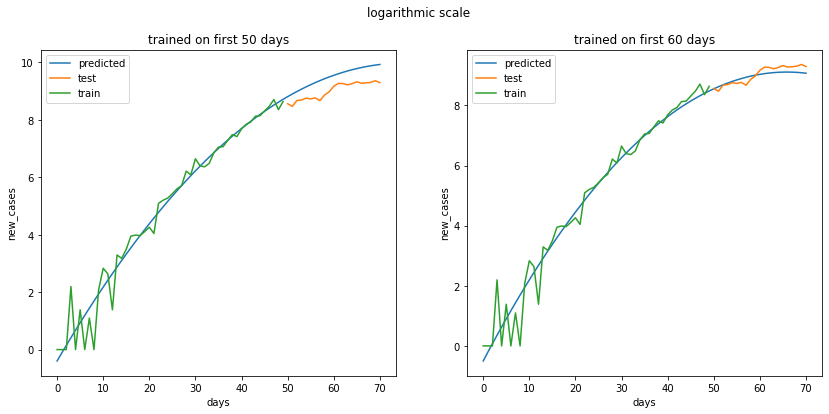

In [92]:
def plot_new_cases_log_scale(model, ax):
    ax.plot(X[:, 1], model.predict(X), label='predicted')
    ax.plot(X_test[:, 1], y_test_new_ln, label='test')
    ax.plot(X_train[:, 1], y_train_new_ln, label='train')
    ax.set(xlabel='days', ylabel='new_cases')
    ax.legend()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
plot_new_cases_log_scale(model, ax1)
plot_new_cases_log_scale(model10, ax2)
ax1.set(title='trained on first 50 days')
ax2.set(title='trained on first 60 days')
fig.suptitle('logarithmic scale')
plt.show()